# Wine dataset exploration with ggplot and test/train splot

## 1. ggplot in python

In [2]:
#import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
!pip install ggplot
from ggplot import *

/Users/angieli/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/angieli/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/angieli/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [64]:
#load input file
df=pd.read_csv('wine_data.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [65]:
#change column names
df.columns = ['Class label', 'Alcohol','Malic acid', 
                   'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols',
                   'Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df['Class label']))
df.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [67]:
#check column property
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
Class label                     177 non-null int64
Alcohol                         177 non-null float64
Malic acid                      177 non-null float64
Ash                             177 non-null float64
Alcalinity of ash               177 non-null float64
Magnesium                       177 non-null int64
Total phenols                   177 non-null float64
Flavanoids                      177 non-null float64
Nonflavanoid phenols            177 non-null float64
Proanthocyanins                 177 non-null float64
Color intensity                 177 non-null float64
Hue                             177 non-null float64
OD280/OD315 of diluted wines    177 non-null float64
Proline                         177 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.4 KB


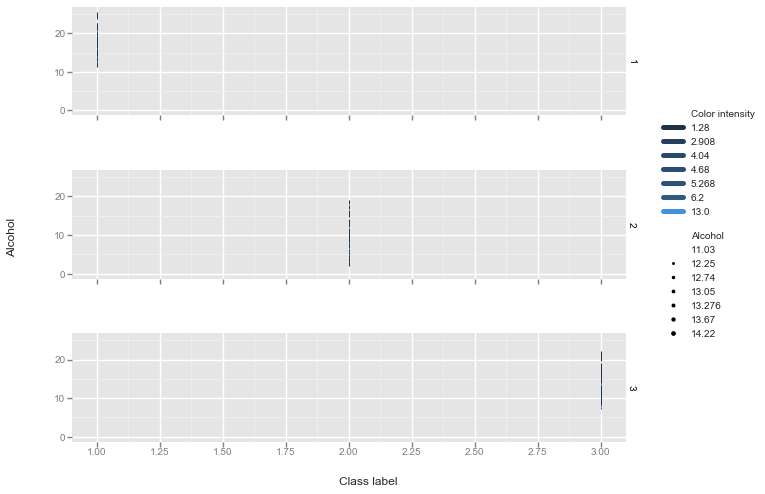

<ggplot: (312054911)>

In [68]:
#ggplot to plot wine alcohol with differnt class
ggplot(aes(x='Class label', y='Alcohol', color='Color intensity', size='Alcohol'),data=df) + geom_point(shape=3) + facet_grid('Class label')

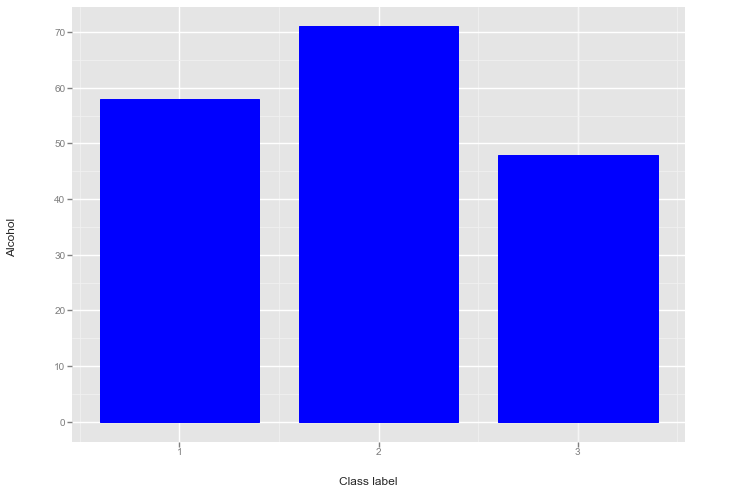

<ggplot: (313421141)>

In [78]:
#trying out ggplot bar chart
ggplot(aes(x='Class label', y='Alcohol'),data=df) + geom_bar(fill='blue')

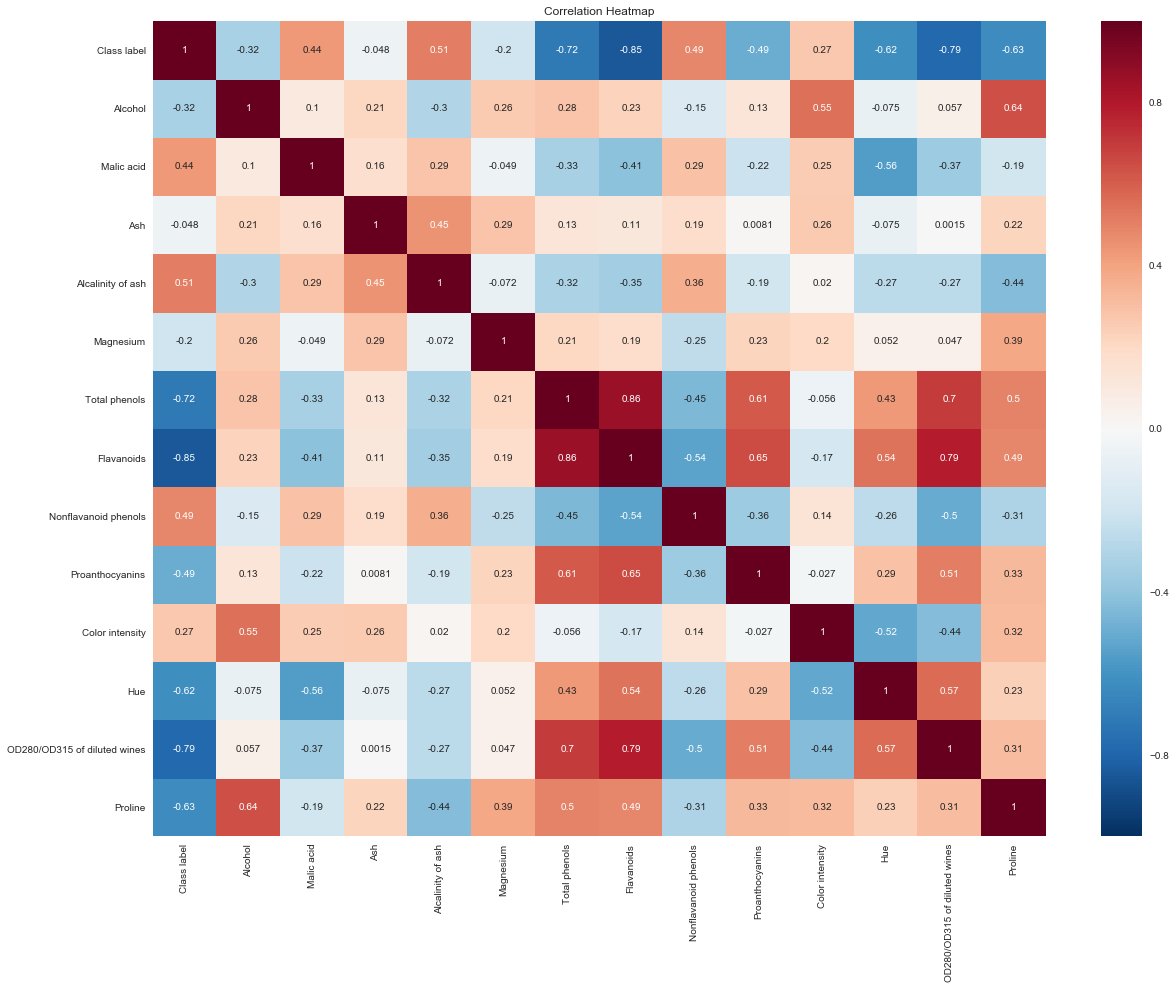

In [79]:
#seaborn hearmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## 2. split data into test and train

In [84]:
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0,stratify=y)

In [88]:
X_train

array([[  1.31700000e+01,   5.19000000e+00,   2.32000000e+00, ...,
          6.00000000e-01,   1.48000000e+00,   7.25000000e+02],
       [  1.37600000e+01,   1.53000000e+00,   2.70000000e+00, ...,
          1.25000000e+00,   3.00000000e+00,   1.23500000e+03],
       [  1.37300000e+01,   1.50000000e+00,   2.70000000e+00, ...,
          1.19000000e+00,   2.71000000e+00,   1.28500000e+03],
       ..., 
       [  1.36200000e+01,   4.95000000e+00,   2.35000000e+00, ...,
          9.10000000e-01,   2.05000000e+00,   5.50000000e+02],
       [  1.22200000e+01,   1.29000000e+00,   1.94000000e+00, ...,
          8.60000000e-01,   3.02000000e+00,   3.12000000e+02],
       [  1.30500000e+01,   5.80000000e+00,   2.13000000e+00, ...,
          7.30000000e-01,   3.10000000e+00,   3.80000000e+02]])